# 📊 Data Preprocessing Lab Works
## Data Cleaning, Transformation, Normalization, Standardization & Outlier Detection

**Topics Covered:**
1. Data Cleaning - Missing values, duplicates, inconsistencies
2. Data Transformation - Encoding, binning, log transform
3. Normalization & Standardization - Min-Max, Z-Score, Robust scaling
4. Outlier Detection - Box plots, Z-score, IQR methods

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder


## Create Sample Dataset

In [25]:
np.random.seed(42)
n = 200

df = pd.DataFrame({
    'employee_id': range(1001, 1001 + n),
    'age': np.random.randint(22, 65, n).astype(float),
    'salary': np.random.normal(60000, 15000, n),
    'department': np.random.choice(['Sales', 'Engineering', 'HR', 'Marketing', 'Finance'], n),
    'experience_years': np.random.randint(0, 30, n).astype(float),
    'performance_score': np.random.uniform(1, 10, n),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'new york', 'NEW YORK', 'L.A.', np.nan], n)
})

# Add missing values
df.loc[np.random.choice(df.index, 15, replace=False), 'age'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'salary'] = np.nan
df.loc[np.random.choice(df.index, 10, replace=False), 'experience_years'] = np.nan

# Add outliers
idx = np.random.choice(df.index, 8, replace=False)
df.loc[idx[:4], 'salary'] = [250000, 280000, 5000, 3000]
df.loc[idx[4:], 'age'] = [95, 98, 15, 16]

# Add duplicates
df = pd.concat([df, df.iloc[:5]], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset: {df.shape}")
df.head(10)

Dataset: (205, 7)


,employee_id,age,salary,department,experience_years,performance_score,city
0,1016,24.0,45727.923740,Finance,24.0,9.775604,nan
1,1010,32.0,65673.399221,HR,29.0,7.272653,Los Angeles
2,1101,28.0,51660.826533,Sales,23.0,7.426577,Chicago
3,1133,60.0,61298.487218,HR,2.0,9.268755,New York
4,1069,NaN,59929.560080,Sales,28.0,9.170795,NEW YORK
5,1096,26.0,67015.756162,Sales,24.0,7.771628,Chicago
6,1160,54.0,68869.741754,Marketing,24.0,8.771663,Los Angeles
7,1163,34.0,NaN,Finance,19.0,5.327533,new york
8,1148,49.0,NaN,Engineering,22.0,8.537417,new york
9,1183,24.0,67382.115509,Marketing,8.0,2.660166,nan


---
# Part 1: Data Cleaning 🧹

## 1.1 Explore Data Quality

In [26]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nDuplicates: {df.duplicated(subset=['employee_id']).sum()}")

Missing Values:
employee_id           0
age                  15
salary               21
department            0
experience_years     10
performance_score     0
city                  0
dtype: int64

Duplicates: 5


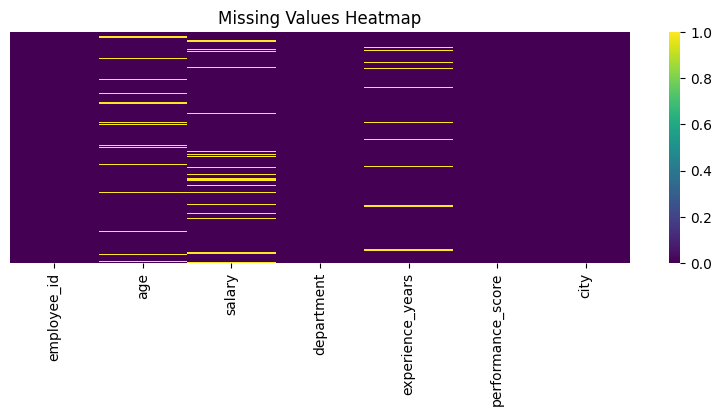

In [27]:
plt.figure(figsize=(10, 3))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### ✏️ Exercise 1.1: Remove Duplicates

In [28]:
# YOUR CODE: Remove duplicates based on employee_id
df_clean = df.drop_duplicates()

print(f"Before: {df.shape[0]}, After: {df_clean.shape[0]}")

Before: 205, After: 200


### ✏️ Exercise 1.2: Handle Missing Values
- `age`: fill with median
- `salary`: fill with mean
- `experience_years`: fill with 0

In [29]:
# YOUR CODE
df_filled = df_clean.copy()
df_filled['age'] = df_clean['age'].fillna(df['age'].median())
df_filled['salary'] = df_clean['salary'].fillna(np.mean(df_clean['salary']))
df_filled['experience_years'] =df_clean['experience_years'].fillna(df_clean['experience_years'].mode()[0])

print(df_filled.isnull().sum())
df_filled

employee_id          0
age                  0
salary               0
department           0
experience_years     0
performance_score    0
city                 0
dtype: int64


,employee_id,age,salary,department,experience_years,performance_score,city
0,1016,24.0,45727.923740,Finance,24.0,9.775604,nan
1,1010,32.0,65673.399221,HR,29.0,7.272653,Los Angeles
2,1101,28.0,51660.826533,Sales,23.0,7.426577,Chicago
3,1133,60.0,61298.487218,HR,2.0,9.268755,New York
4,1069,44.0,59929.560080,Sales,28.0,9.170795,NEW YORK
...,...,...,...,...,...,...,...
200,1107,44.0,62247.505745,Finance,25.0,5.113002,New York
201,1015,45.0,70771.924197,Finance,19.0,1.047700,New York
202,1093,56.0,66279.592038,Marketing,26.0,7.673148,New York
203,1180,44.0,85320.255486,Sales,11.0,6.015748,Chicago


### ✏️ Exercise 1.3: Standardize Text
Clean `city`: title case, replace 'L.A.' → 'Los Angeles', fill NaN with 'Unknown'

In [30]:
print("Before:", df_filled['city'].unique())

# YOUR CODE
df_filled['city'] = df_filled['city'].str.title()  # title case
df_filled['city'] = df_filled['city'].replace('L.A.','Los Angeles')  # replace L.A.
df_filled['city'] = df_filled['city'].replace('Nan','Unknown')  # fill NaN

print("After:", df_filled['city'].unique())

Before: ['nan' 'Los Angeles' 'Chicago' 'New York' 'NEW YORK' 'new york' 'L.A.']
After: ['Unknown' 'Los Angeles' 'Chicago' 'New York']


---
# Part 2: Data Transformation 🔄

In [31]:
df_transform = df_filled.copy()

### ✏️ Exercise 2.1: Label Encoding

In [32]:
# YOUR CODE: Label encode 'department'
le = LabelEncoder()
df_transform['department'] = le.fit_transform(df_transform['department'])

print(dict(zip(le.classes_, range(len(le.classes_)))))

{'Engineering': 0, 'Finance': 1, 'HR': 2, 'Marketing': 3, 'Sales': 4}


### ✏️ Exercise 2.2: One-Hot Encoding

In [33]:
# YOUR CODE: One-hot encode 'department' with prefix 'dept'
dept_dummies = pd.get_dummies(df['department'])

dept_dummies.head()

,Engineering,Finance,HR,Marketing,Sales
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,False,False,True


### ✏️ Exercise 2.3: Binning
Create age groups: Young (<30), Middle (30-50), Senior (>50)

In [34]:
# YOUR CODE
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle', 'Senior']
df_transform['age_group'] = pd.cut(df_transform['age'],bins=bins, labels=labels, right=False)

print(df_transform['age_group'].value_counts())

age_group
Middle    95
Senior    62
Young     43
Name: count, dtype: int64


## 2.4 Log Transformation

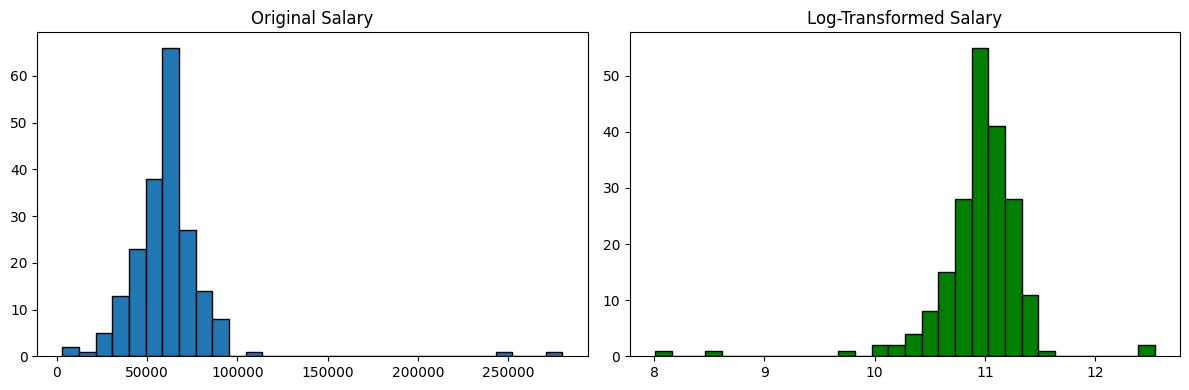

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df_transform['salary'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('Original Salary')
axes[1].hist(np.log1p(df_transform['salary'][df_transform['salary']>0]), bins=30, edgecolor='black', color='green')
axes[1].set_title('Log-Transformed Salary')
plt.tight_layout()
plt.show()

---
# Part 3: Normalization & Standardization 📏

In [36]:
numeric_cols = ['age', 'salary', 'experience_years', 'performance_score']
df_numeric = df_transform[numeric_cols].copy()
df_numeric.describe()

,age,salary,experience_years,performance_score
count,200.00000,200.000000,200.000000,200.000000
mean,42.85500,61531.955482,15.285000,5.614868
std,13.62727,25922.747104,8.317432,2.488140
min,15.00000,3000.000000,0.000000,1.024398
25%,31.75000,50898.101347,9.000000,3.632643
50%,44.00000,61531.955482,15.000000,5.798410
75%,53.00000,68237.717774,23.000000,7.702128
max,98.00000,280000.000000,29.000000,9.979234


### ✏️ Exercise 3.1: Min-Max Normalization (0-1)

In [37]:
# YOUR CODE
scaler_mm = MinMaxScaler()
df_normalized = scaler_mm.fit_transform(df_transform[numeric_cols])
df_normalized = pd.DataFrame(df_normalized, columns=numeric_cols)
print(df_normalized.describe())

              age      salary  experience_years  performance_score
count  200.000000  200.000000        200.000000         200.000000
mean     0.335602    0.211307          0.527069           0.512625
std      0.164184    0.093584          0.286808           0.277854
min      0.000000    0.000000          0.000000           0.000000
25%      0.201807    0.172917          0.310345           0.291267
50%      0.349398    0.211307          0.517241           0.533121
75%      0.457831    0.235515          0.793103           0.745712
max      1.000000    1.000000          1.000000           1.000000


### ✏️ Exercise 3.2: Z-Score Standardization (mean=0, std=1)

In [38]:
# YOUR CODE
scaler_std = StandardScaler()
df_standardized = scaler_mm.fit_transform(df_transform[numeric_cols])
df_standardized = pd.DataFrame(df_standardized, columns=numeric_cols)

print(df_standardized.describe())

              age      salary  experience_years  performance_score
count  200.000000  200.000000        200.000000         200.000000
mean     0.335602    0.211307          0.527069           0.512625
std      0.164184    0.093584          0.286808           0.277854
min      0.000000    0.000000          0.000000           0.000000
25%      0.201807    0.172917          0.310345           0.291267
50%      0.349398    0.211307          0.517241           0.533121
75%      0.457831    0.235515          0.793103           0.745712
max      1.000000    1.000000          1.000000           1.000000


## 3.3 Compare Scaling Methods

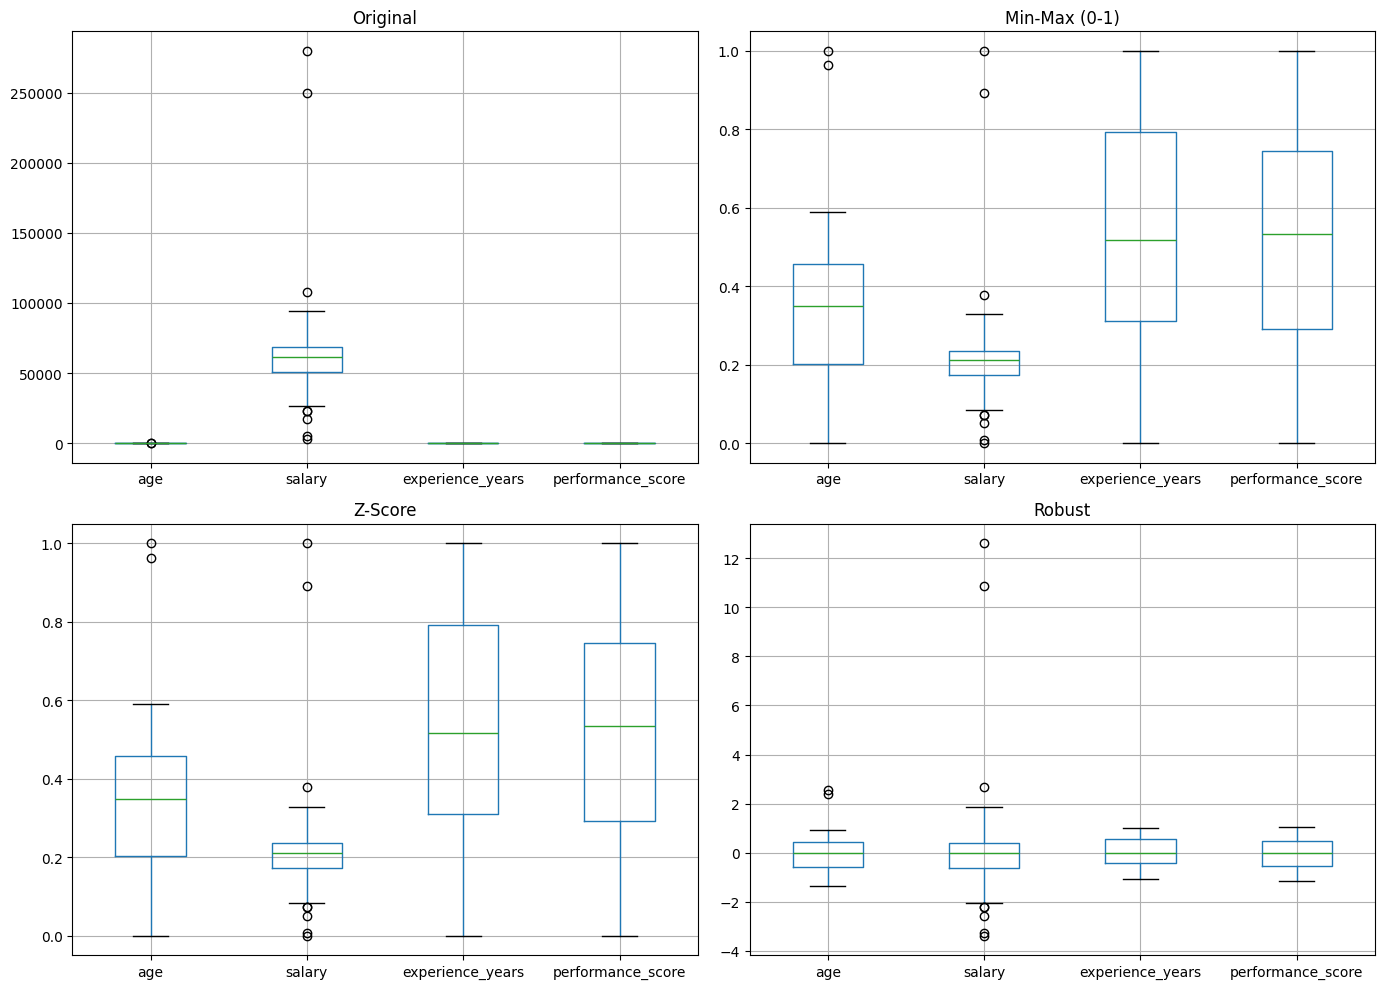

In [39]:
df_robust = pd.DataFrame(RobustScaler().fit_transform(df_numeric), columns=numeric_cols)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
df_numeric.boxplot(ax=axes[0,0]); axes[0,0].set_title('Original')
df_normalized.boxplot(ax=axes[0,1]); axes[0,1].set_title('Min-Max (0-1)')
df_standardized.boxplot(ax=axes[1,0]); axes[1,0].set_title('Z-Score')
df_robust.boxplot(ax=axes[1,1]); axes[1,1].set_title('Robust')
plt.tight_layout()
plt.show()

---
# Part 4: Outlier Detection 🔍

In [40]:
df_outliers = df_transform.copy()

## 4.1 Box Plot Visualization

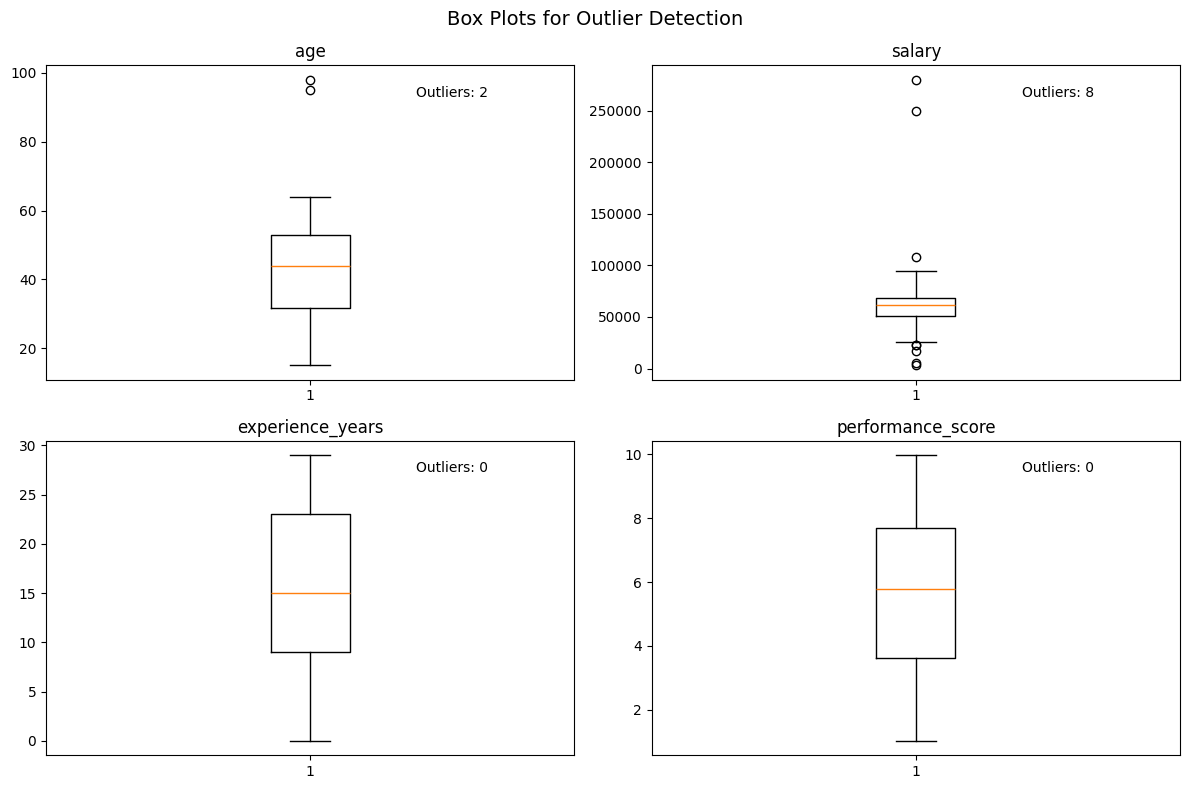

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), ['age', 'salary', 'experience_years', 'performance_score']):
    ax.boxplot(df_outliers[col].dropna())
    ax.set_title(f'{col}')
    q1, q3 = df_outliers[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((df_outliers[col] < q1-1.5*iqr) | (df_outliers[col] > q3+1.5*iqr)).sum()
    ax.text(0.7, 0.9, f'Outliers: {outliers}', transform=ax.transAxes)
plt.suptitle('Box Plots for Outlier Detection', fontsize=14)
plt.tight_layout()
plt.show()

### ✏️ Exercise 4.1: IQR Method
Implement outlier detection using IQR: outliers are values < Q1-1.5×IQR or > Q3+1.5×IQR

In [42]:
def detect_outliers_iqr(data, column):
    # YOUR CODE
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers_mask = (data[column]<lower)|(data[column]>upper)
    return {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'lower': lower, 'upper': upper,
            'count': outliers_mask.sum(), 'mask': outliers_mask}
result = detect_outliers_iqr(df_outliers, 'salary')
print(f"Salary: Bounds [{result['lower']:.0f}, {result['upper']:.0f}], Outliers: {result['count']}")

Salary: Bounds [24889, 94247], Outliers: 8


### ✏️ Exercise 4.2: Z-Score Method
Detect outliers where |Z-score| > threshold (default: 3)

In [43]:
def detect_outliers_zscore(data, column, threshold=3):
    # YOUR CODE
    mean = np.mean(data[column])
    std = np.std(data[column])
    z_scores = (data[column]-mean)/std
    outliers_mask = np.abs(z_scores)>threshold
    return {'mean': mean, 'std': std, 'z_scores': z_scores,
            'count': outliers_mask.sum(), 'mask': outliers_mask}

result = detect_outliers_zscore(df_outliers, 'salary')
print(f"Z-Score method: {result['count']} outliers")

Z-Score method: 2 outliers


## 4.3 Compare Methods

IQR Method: 8 outliers
Z-Score (|z|>3): 2 outliers


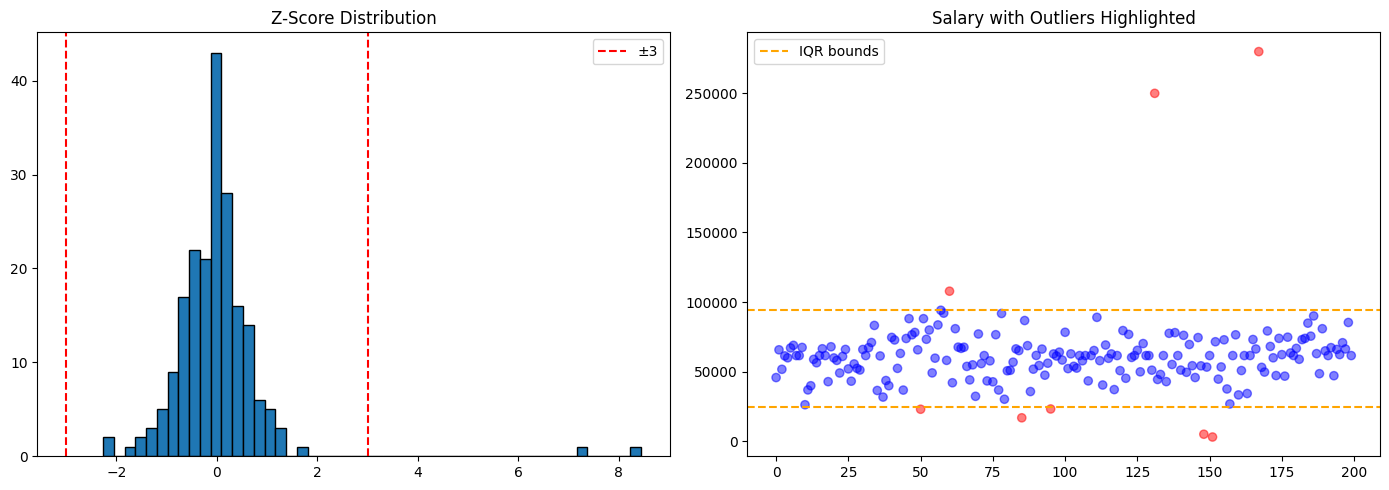

In [44]:
iqr_r = detect_outliers_iqr(df_outliers, 'salary')
zscore_r = detect_outliers_zscore(df_outliers, 'salary', 3)

print(f"IQR Method: {iqr_r['count']} outliers")
print(f"Z-Score (|z|>3): {zscore_r['count']} outliers")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(zscore_r['z_scores'].dropna(), bins=50, edgecolor='black')
axes[0].axvline(3, color='red', linestyle='--', label='±3')
axes[0].axvline(-3, color='red', linestyle='--')
axes[0].set_title('Z-Score Distribution'); axes[0].legend()

colors = ['red' if x else 'blue' for x in iqr_r['mask']]
axes[1].scatter(range(len(df_outliers)), df_outliers['salary'], c=colors, alpha=0.5)
axes[1].axhline(iqr_r['upper'], color='orange', linestyle='--', label='IQR bounds')
axes[1].axhline(iqr_r['lower'], color='orange', linestyle='--')
axes[1].set_title('Salary with Outliers Highlighted'); axes[1].legend()
plt.tight_layout()
plt.show()

### ✏️ Exercise 4.3: Cap Outliers (Winsorization)

In [45]:
def cap_outliers(data, column):
    # YOUR CODE: Cap values at IQR bounds using np.clip
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return IQR

df_outliers['salary_capped'] = cap_outliers(df_outliers, 'salary')
print(f"Before: Min={df_outliers['salary'].min():.0f}, Max={df_outliers['salary'].max():.0f}")
print(f"After:  Min={df_outliers['salary_capped'].min():.0f}, Max={df_outliers['salary_capped'].max():.0f}")

Before: Min=3000, Max=280000
After:  Min=17340, Max=17340


---
# Part 5: Complete Pipeline 🏆

In [46]:
def preprocess_pipeline(data):
    df_p = data.copy()

    # 1. Remove duplicates
    df_p = df_p.drop_duplicates(subset=['employee_id'])

    # 2. Handle missing values
    df_p['age'] = df_p['age'].fillna(df_p['age'].median())
    df_p['salary'] = df_p['salary'].fillna(df_p['salary'].mean())
    df_p['experience_years'] = df_p['experience_years'].fillna(0)
    df_p['city'] = df_p['city'].str.title().replace('L.A.', 'Los Angeles').fillna('Unknown')

    # 3. Cap outliers
    for col in ['salary', 'age']:
        Q1, Q3 = df_p[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df_p[col] = np.clip(df_p[col], Q1-1.5*IQR, Q3+1.5*IQR)

    # 4. Scale numeric features
    num_cols = ['age', 'salary', 'experience_years', 'performance_score']
    scaler = StandardScaler()
    df_p[[f'{c}_scaled' for c in num_cols]] = scaler.fit_transform(df_p[num_cols])

    # 5. Encode categorical
    df_p['dept_encoded'] = LabelEncoder().fit_transform(df_p['department'])
    df_p = pd.concat([df_p, pd.get_dummies(df_p['city'], prefix='city')], axis=1)

    return df_p

df_final = preprocess_pipeline(df)
print(f"Final shape: {df_final.shape}")
df_final.head()

Final shape: (200, 16)


,employee_id,age,salary,department,experience_years,performance_score,city,age_scaled,salary_scaled,experience_years_scaled,performance_score_scaled,dept_encoded,city_Chicago,city_Los Angeles,city_Nan,city_New York
0,1016,24.0,45727.923740,Finance,24.0,9.775604,Nan,-1.422147,-0.940402,1.053006,1.676424,1,False,False,True,False
1,1010,32.0,65673.399221,HR,29.0,7.272653,Los Angeles,-0.815000,0.371594,1.612223,0.667947,2,False,True,False,False
2,1101,28.0,51660.826533,Sales,23.0,7.426577,Chicago,-1.118574,-0.550141,0.941162,0.729965,4,True,False,False,False
3,1133,60.0,61298.487218,HR,2.0,9.268755,New York,1.310015,0.083816,-1.407549,1.472206,2,False,False,False,True
4,1069,44.0,59929.560080,Sales,28.0,9.170795,New York,0.095721,-0.006231,1.500379,1.432737,4,False,False,False,True


---
# Summary 📝

| Technique | When to Use |
|-----------|-------------|
| **Min-Max** | Bounded values needed, no outliers |
| **Z-Score** | Normal distribution assumed |
| **Robust** | Data has many outliers |
| **IQR** | Robust outlier detection |
| **Z-Score Outliers** | Normal distribution |
| **Label Encoding** | Ordinal categories |
| **One-Hot** | Nominal categories |